In [1]:
import pandas as pd
import warnings as warn
warn.filterwarnings('ignore')

In [2]:
dffd = pd.read_csv('preprocessed_data.csv')
dffd

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_days,incident_days
0,328,48,2,1,1000,1406.91,0,1,4,2,...,71610,6510,13020,52080,10,1,2004,1,16360,16460
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,5070,780,780,3510,8,12,2007,1,13326,16456
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,34650,7700,3850,23100,4,30,2007,0,11206,16488
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,63400,6340,6340,50720,3,34,2014,1,7449,16445
4,256,39,2,1,1000,1351.10,0,0,6,12,...,64100,6410,6410,51280,10,3,2003,1,13433,16437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,3,38,2,2,1000,1310.80,0,0,5,2,...,87200,17440,8720,61040,6,6,2006,0,7866,16488
905,285,41,0,0,1000,1436.79,0,0,6,9,...,108480,18080,18080,72320,13,28,2015,0,16075,16459
906,130,34,2,1,500,1383.49,3000000,0,5,1,...,67500,7500,7500,52500,11,19,1996,0,12100,16458
907,458,62,0,2,2000,1356.92,5000000,1,0,5,...,46980,5220,5220,36540,1,5,1998,0,15296,16492


In [3]:
dffd['fraud_reported'].value_counts()

,count
fraud_reported,
0,668
1,241


In [4]:
Xfd = dffd.drop('fraud_reported', axis=1)
yfd = dffd['fraud_reported']

Recursive Feature Elimination (RFE)

In [5]:
from sklearn.ensemble import RandomForestClassifier as Rforest
from sklearn.feature_selection import RFE as RFEfd

##initialising the model
MDL = Rforest()
# RFE with the desired number of features
selector = RFEfd(MDL, n_features_to_select=18)

selector.fit(Xfd, yfd)
ft_chosen = Xfd.columns[selector.support_]
print("Selected features using RFE:", ft_chosen)

Selected features using RFE: Index(['months_as_customer', 'age', 'policy_annual_premium',
       'insured_occupation', 'insured_hobbies', 'capital-gains',
       'capital-loss', 'incident_severity', 'incident_hour_of_the_day',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_make', 'auto_model', 'auto_year', 'policy_bind_days',
       'incident_days'],
      dtype='object')


In [6]:
chosenX = Xfd[ft_chosen]
chosenX

,months_as_customer,age,policy_annual_premium,insured_occupation,insured_hobbies,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_days,incident_days
0,328,48,1406.91,2,17,53300,0,0,5,71610,6510,13020,52080,10,1,2004,16360,16460
1,228,42,1197.22,6,15,0,0,1,8,5070,780,780,3510,8,12,2007,13326,16456
2,134,29,1413.14,11,2,35100,0,1,7,34650,7700,3850,23100,4,30,2007,11206,16488
3,256,41,1415.74,1,2,48900,-62400,0,5,63400,6340,6340,50720,3,34,2014,7449,16445
4,256,39,1351.10,12,3,0,0,0,19,64100,6410,6410,51280,10,3,2003,13433,16437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,3,38,1310.80,2,13,0,0,1,20,87200,17440,8720,61040,6,6,2006,7866,16488
905,285,41,1436.79,9,17,70900,0,0,23,108480,18080,18080,72320,13,28,2015,16075,16459
906,130,34,1383.49,1,3,35100,0,1,4,67500,7500,7500,52500,11,19,1996,12100,16458
907,458,62,1356.92,5,0,0,0,0,2,46980,5220,5220,36540,1,5,1998,15296,16492


Data balancing - SMOTE

In [7]:
from imblearn.over_sampling import SMOTE as smtfd
from collections import Counter as cntfd

sm = smtfd()
Xfd_resam, yfd_resam = sm.fit_resample(chosenX, yfd)

print("Imbalanced distribution of data:", cntfd(yfd))
print("Balanced distribution of data:", cntfd(yfd_resam))

Imbalanced distribution of data: Counter({0: 668, 1: 241})
Balanced distribution of data: Counter({1: 668, 0: 668})


Data splitting - Train = 60%, Val. = 20%, Test = 20%

In [8]:
from sklearn.model_selection import train_test_split as fdtts

IX_tran, IX_tem, Iy_tran, Iy_tem = fdtts(Xfd_resam, yfd_resam, test_size=0.4, random_state=2)
IX_val, IX_tst, Iy_val, Iy_tst = fdtts(IX_tem, Iy_tem, test_size=0.5, random_state=2)

print(f"Samples for the training : {IX_tran.shape}")
print(f"Samples for the validation: {IX_val.shape}")
print(f"Samples for the testing: {IX_tst.shape}")

Samples for the training : (801, 18)
Samples for the validation: (267, 18)
Samples for the testing: (268, 18)


In [9]:
from sklearn.model_selection import GridSearchCV as fd_grid
from sklearn.metrics import classification_report as fd_reprt
import time as fd_tme
from sklearn.metrics import mean_squared_error as fd_mse
from sklearn.metrics import confusion_matrix as fd_matrx
from sklearn.metrics import ConfusionMatrixDisplay as fd_matrx_dsply

XGBoost

In [10]:
from xgboost import XGBClassifier as XGBC

MDL = XGBC()
pmfd = {'n_estimators': [20, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0]}

pm = fd_grid(estimator=MDL, param_grid=pmfd, scoring='accuracy', cv=2, verbose=1)
pm.fit(IX_tran, Iy_tran)
bst_pms = pm.best_params_
print("\nOptimal parameters of XGB:")
print(bst_pms)

Fitting 2 folds for each of 81 candidates, totalling 162 fits

Optimal parameters of XGB:
{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.7}



Training period: 0.278456449508667 sec.
Training accuracy: 0.9151061173533084
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       125
           1       0.84      0.90      0.87       142

    accuracy                           0.86       267
   macro avg       0.86      0.85      0.86       267
weighted avg       0.86      0.86      0.86       267


Validation period: 0.017035722732543945 sec.
Val. MSE: 0.14232209737827714


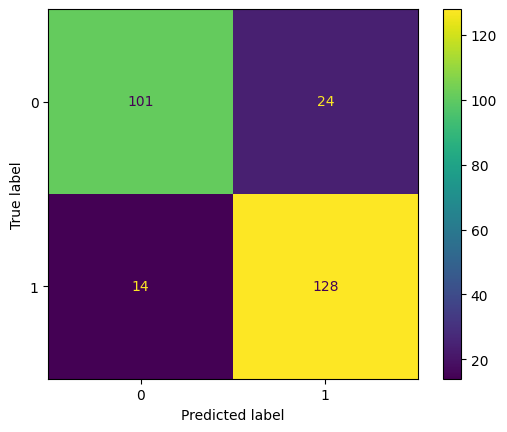

In [11]:
ST = fd_tme.time()
MDL_bst = XGBC(**bst_pms)
MDL_bst.fit(IX_tran, Iy_tran)
ED = fd_tme.time()
T = ED - ST
print(f"\nTraining period: {T} sec.")
Acc = MDL_bst.score(IX_tran, Iy_tran)
print(f"Training accuracy: {Acc}")


ST = fd_tme.time()
Predt_Val = MDL_bst.predict(IX_val)
Probb_Val  = MDL_bst.predict_proba(IX_val)[:, 1]
ED = fd_tme.time()
T = ED - ST
print(fd_reprt(Iy_val, Predt_Val))
print(f"\nValidation period: {T} sec.")
MSEval = fd_mse(Iy_val, Predt_Val)
print("Val. MSE:", MSEval)
Matx = fd_matrx(Iy_val, Predt_Val)
fd_matrx_dsply(confusion_matrix=Matx).plot()

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       141
           1       0.84      0.88      0.86       127

    accuracy                           0.87       268
   macro avg       0.87      0.87      0.87       268
weighted avg       0.87      0.87      0.87       268


Testing period: 0.019543170928955078 sec.
Test MSE: 0.13432835820895522


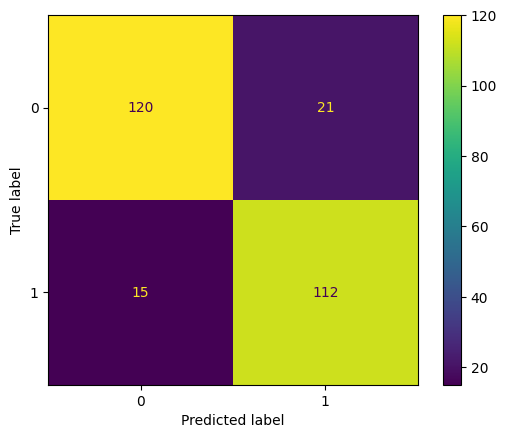

In [12]:
ST = fd_tme.time()
Predt_tst = MDL_bst.predict(IX_tst)
Probb_tst  = MDL_bst.predict_proba(IX_tst)[:, 1]
ED = fd_tme.time()
T = ED - ST
print(fd_reprt(Iy_tst, Predt_tst))
print(f"\nTesting period: {T} sec.")
MSEtst = fd_mse(Iy_tst, Predt_tst)
print("Test MSE:", MSEtst)
Matx = fd_matrx(Iy_tst, Predt_tst)
fd_matrx_dsply(confusion_matrix=Matx).plot()

Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier as RFC

MDL = RFC()
pmfd = {'n_estimators': [20, 50, 100],
    'max_depth': [2, 3, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']}

pm = fd_grid(estimator=MDL, param_grid=pmfd, scoring='accuracy', cv=2, verbose=1)
pm.fit(IX_tran, Iy_tran)
bst_pms = pm.best_params_
print("\nOptimal parameters of RF:")
print(bst_pms)

Fitting 2 folds for each of 162 candidates, totalling 324 fits

Optimal parameters of RF:
{'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 20}



Training period: 0.058026790618896484 sec.
Training accuracy: 0.8339575530586767
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       125
           1       0.83      0.82      0.83       142

    accuracy                           0.82       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.82      0.82      0.82       267


Validation period: 0.012434959411621094 sec.
Val. MSE: 0.18352059925093633


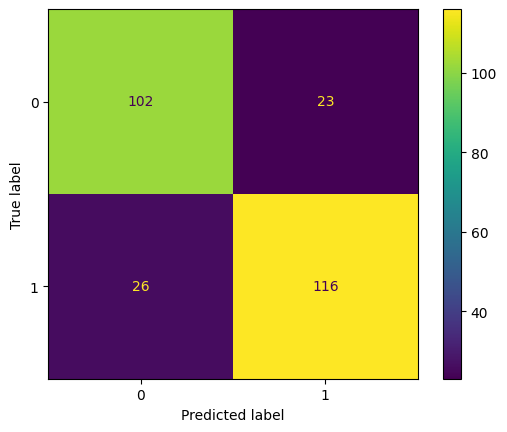

In [14]:
ST = fd_tme.time()
MDL_bst = RFC(**bst_pms)
MDL_bst.fit(IX_tran, Iy_tran)
ED = fd_tme.time()
T = ED - ST
print(f"\nTraining period: {T} sec.")
Acc = MDL_bst.score(IX_tran, Iy_tran)
print(f"Training accuracy: {Acc}")


ST = fd_tme.time()
Predt_Val = MDL_bst.predict(IX_val)
Probb_Val  = MDL_bst.predict_proba(IX_val)[:, 1]
ED = fd_tme.time()
T = ED - ST
print(fd_reprt(Iy_val, Predt_Val))
print(f"\nValidation period: {T} sec.")
MSEval = fd_mse(Iy_val, Predt_Val)
print("Val. MSE:", MSEval)
Matx = fd_matrx(Iy_val, Predt_Val)
fd_matrx_dsply(confusion_matrix=Matx).plot()

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       141
           1       0.84      0.77      0.81       127

    accuracy                           0.82       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.82      0.82       268


Testing period: 0.012980222702026367 sec.
Test MSE: 0.17537313432835822


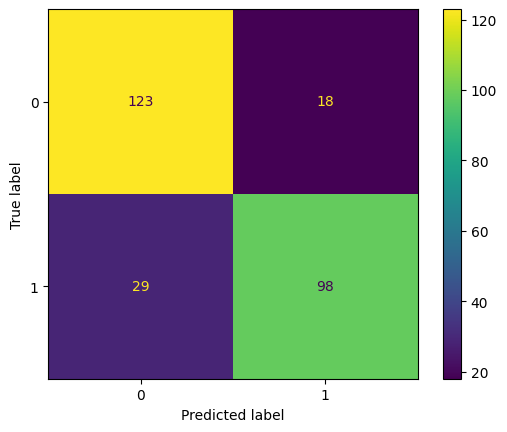

In [15]:
ST = fd_tme.time()
Predt_tst = MDL_bst.predict(IX_tst)
Probb_tst  = MDL_bst.predict_proba(IX_tst)[:, 1]
ED = fd_tme.time()
T = ED - ST
print(fd_reprt(Iy_tst, Predt_tst))
print(f"\nTesting period: {T} sec.")
MSEtst = fd_mse(Iy_tst, Predt_tst)
print("Test MSE:", MSEtst)
Matx = fd_matrx(Iy_tst, Predt_tst)
fd_matrx_dsply(confusion_matrix=Matx).plot()

Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression as LRC

MDL = LRC()
pmfd = {'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'penalty': ['l1', 'l2', 'elasticnet', None]}

pm = fd_grid(estimator=MDL, param_grid=pmfd, scoring='accuracy', cv=2, verbose=1)
pm.fit(IX_tran, Iy_tran)
bst_pms = pm.best_params_
print("\nOptimal parameters of LR:")
print(bst_pms)

Fitting 2 folds for each of 48 candidates, totalling 96 fits

Optimal parameters of LR:
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}



Training period: 0.04422879219055176 sec.
Training accuracy: 0.8352059925093633
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       125
           1       0.85      0.88      0.87       142

    accuracy                           0.85       267
   macro avg       0.85      0.85      0.85       267
weighted avg       0.85      0.85      0.85       267


Validation period: 0.0033156871795654297 sec.
Val. MSE: 0.14606741573033707


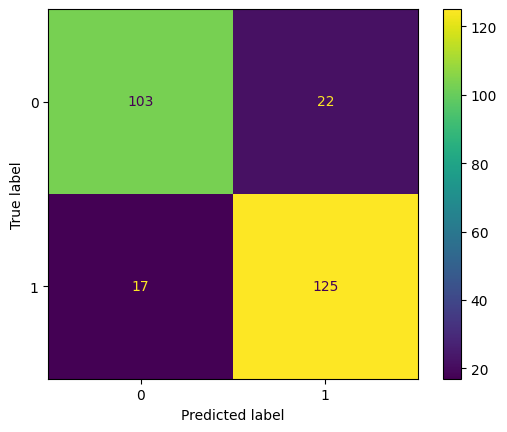

In [17]:
ST = fd_tme.time()
MDL_bst = LRC(**bst_pms)
MDL_bst.fit(IX_tran, Iy_tran)
ED = fd_tme.time()
T = ED - ST
print(f"\nTraining period: {T} sec.")
Acc = MDL_bst.score(IX_tran, Iy_tran)
print(f"Training accuracy: {Acc}")


ST = fd_tme.time()
Predt_Val = MDL_bst.predict(IX_val)
Probb_Val  = MDL_bst.predict_proba(IX_val)[:, 1]
ED = fd_tme.time()
T = ED - ST
print(fd_reprt(Iy_val, Predt_Val))
print(f"\nValidation period: {T} sec.")
MSEval = fd_mse(Iy_val, Predt_Val)
print("Val. MSE:", MSEval)
Matx = fd_matrx(Iy_val, Predt_Val)
fd_matrx_dsply(confusion_matrix=Matx).plot()

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       141
           1       0.87      0.83      0.85       127

    accuracy                           0.86       268
   macro avg       0.86      0.86      0.86       268
weighted avg       0.86      0.86      0.86       268


Testing period: 0.006800413131713867 sec.
Test MSE: 0.13805970149253732


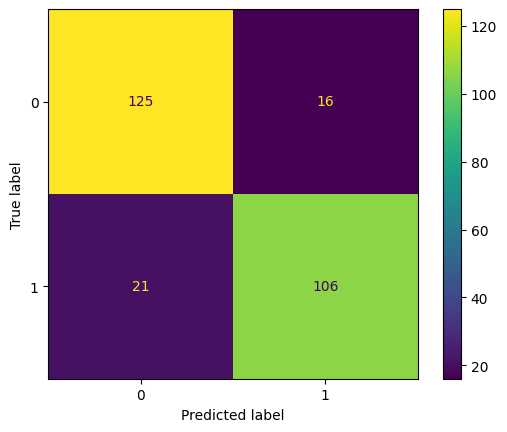

In [18]:
ST = fd_tme.time()
Predt_tst = MDL_bst.predict(IX_tst)
Probb_tst  = MDL_bst.predict_proba(IX_tst)[:, 1]
ED = fd_tme.time()
T = ED - ST
print(fd_reprt(Iy_tst, Predt_tst))
print(f"\nTesting period: {T} sec.")
MSEtst = fd_mse(Iy_tst, Predt_tst)
print("Test MSE:", MSEtst)
Matx = fd_matrx(Iy_tst, Predt_tst)
fd_matrx_dsply(confusion_matrix=Matx).plot()